In [2174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2175]:
insurance = pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2176]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2177]:
insurance.shape

(1338, 7)

In [2178]:
insurance[insurance.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [2179]:
insurance = insurance.drop_duplicates()

# Data Analysis and Visualization

### Categorical Data

- **Region Column**

In [2182]:
insurance.region.value_counts().sort_values(ascending = False)

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

<Axes: xlabel='region', ylabel='count'>

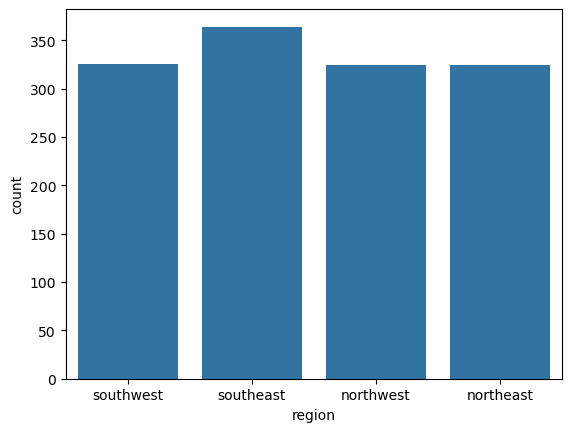

In [2183]:
sns.countplot(data=insurance, x='region')

- **Sex Column**

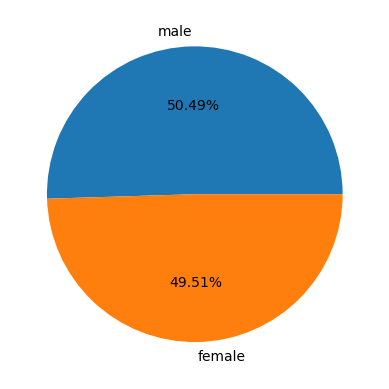

In [2185]:
plt.pie(x = insurance.sex.value_counts(), labels = insurance.sex.value_counts().index, autopct = "%1.2f%%")
plt.show()

- **Smoker Column**

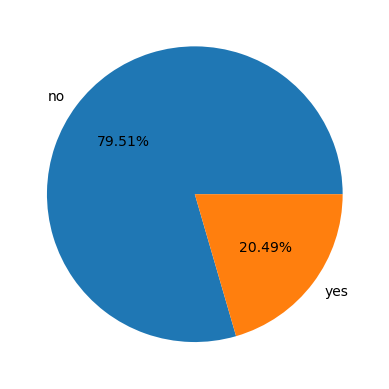

In [2187]:
plt.pie(x = insurance.smoker.value_counts(), labels = insurance.smoker.value_counts().index, autopct = "%1.2f%%")
plt.show()

### Continious and Discrete Data

In [2189]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- **Age Column**

<Axes: xlabel='age', ylabel='Count'>

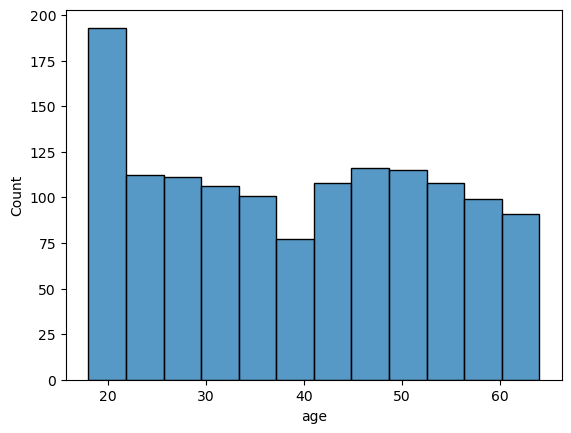

In [2191]:
sns.histplot(insurance.age)

<Axes: xlabel='bmi', ylabel='Count'>

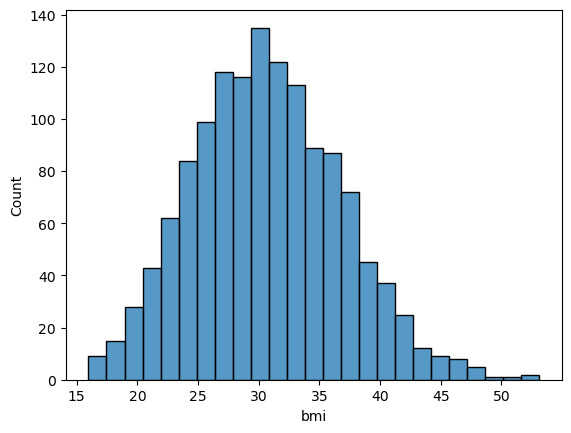

In [2192]:
sns.histplot(insurance.bmi)

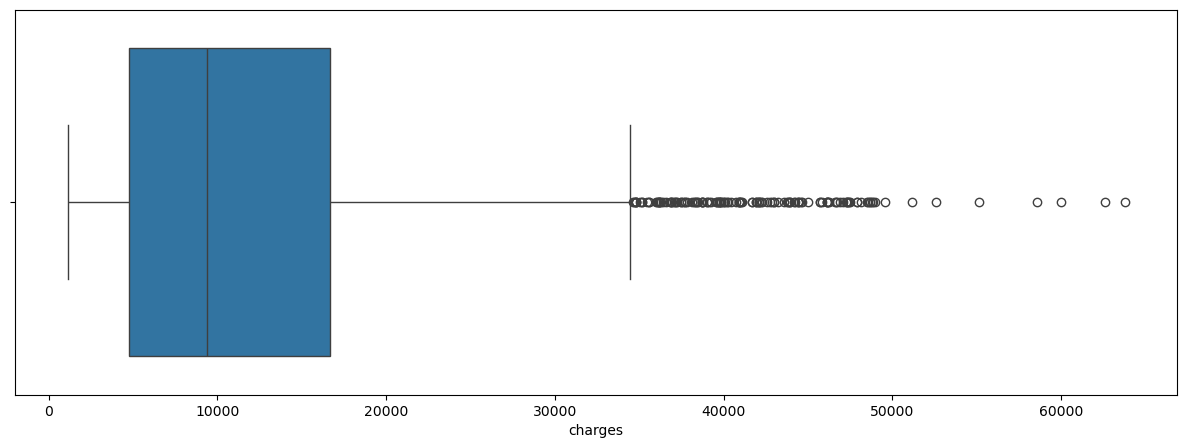

In [2193]:
plt.figure(figsize = (15, 5))
sns.boxplot(x = insurance.charges)
plt.show()

|**BMI Scale**|
 -------------

| Category      | BMI Range (kg/m²) |
| --------      | ----------------- |
| Underweight   | < 18.5            |
| Normal weight | 18.5 – 24.9       |
| Overweight    | 25 – 29.9         |
| Obese         | 30+               |


In [2195]:
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi>= 18.5 and bmi < 25:
        return "Normal Weight"
    elif bmi >= 25 and bmi<30:
        return "Overweight"
    else:
        return "Obese"

insurance['bmi_category'] = insurance['bmi'].apply(bmi_category)

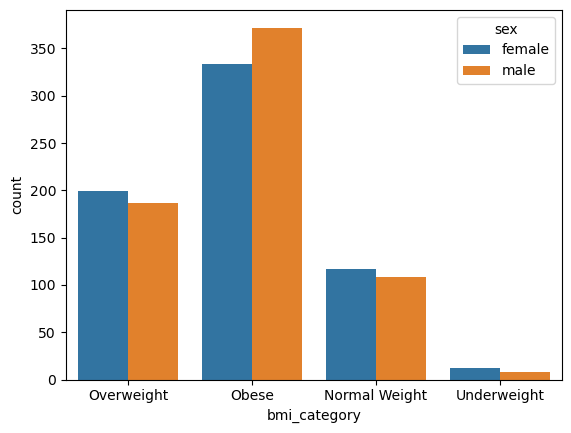

In [2196]:
sns.countplot(data = insurance, x = "bmi_category", hue = "sex" )
plt.show()

<Axes: xlabel='bmi_category', ylabel='charges'>

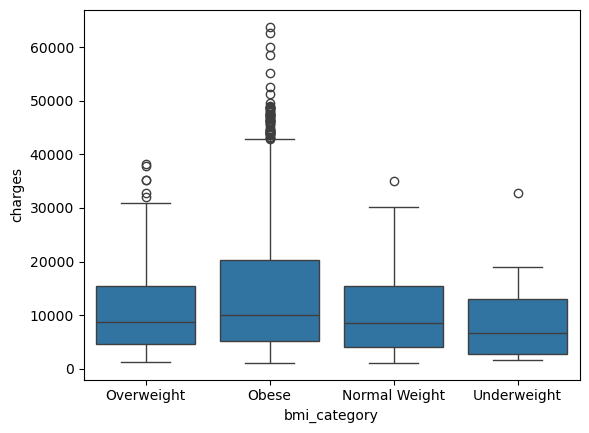

In [2197]:
sns.boxplot(data = insurance, x = 'bmi_category', y = 'charges')

<Axes: xlabel='sex', ylabel='charges'>

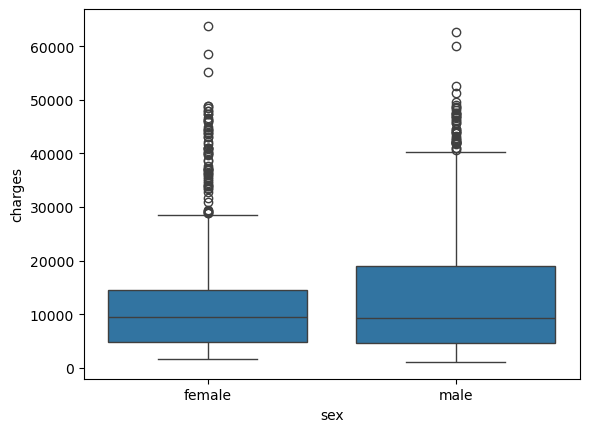

In [2198]:
sns.boxplot(data = insurance, x = 'sex', y = 'charges')

<Axes: xlabel='smoker', ylabel='charges'>

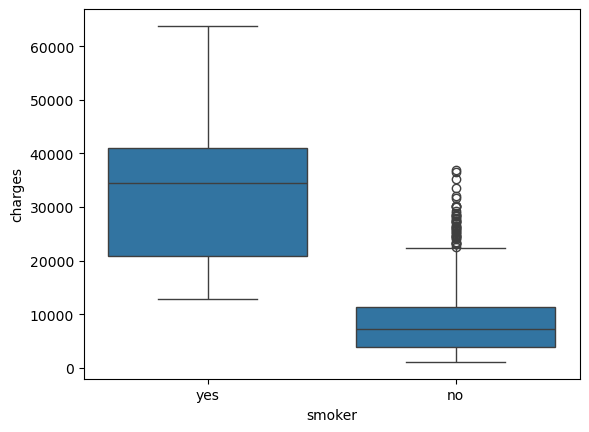

In [2199]:
sns.boxplot(data = insurance, x = 'smoker', y = 'charges')

<Axes: xlabel='age', ylabel='charges'>

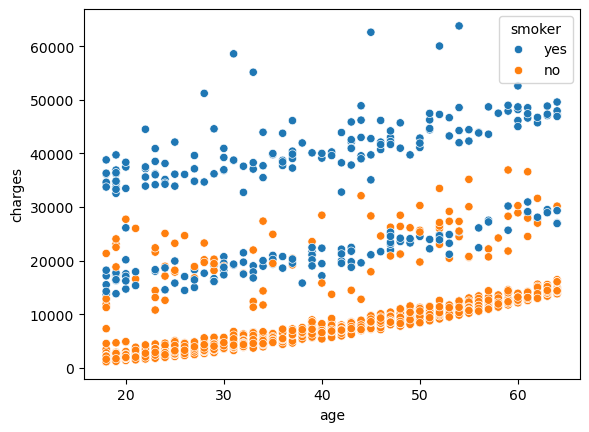

In [2200]:
sns.scatterplot(data = insurance, x = "age", y = "charges", hue = 'smoker')

<Axes: xlabel='age', ylabel='charges'>

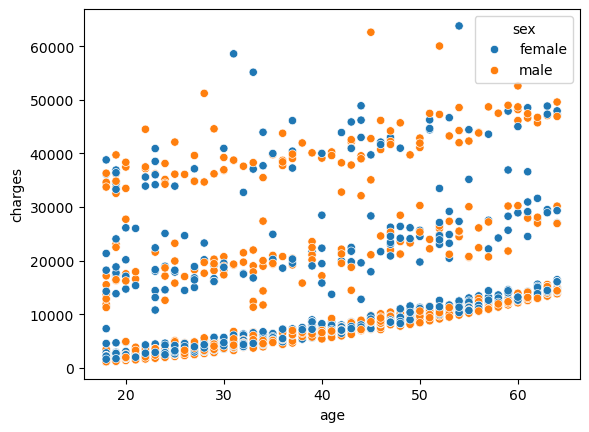

In [2201]:
sns.scatterplot(data = insurance, x = "age", y = "charges", hue = 'sex')

# Data Preparation

In [2203]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


In [2204]:
insurance.sex = insurance.sex.map({'male': 1, 'female': 0})
insurance.smoker = insurance.smoker.map({'yes': 1, 'no': 0})

In [2205]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,bmi_category
0,19,0,27.900,0,1,southwest,16884.92400,Overweight
1,18,1,33.770,1,0,southeast,1725.55230,Obese
2,28,1,33.000,3,0,southeast,4449.46200,Obese
3,33,1,22.705,0,0,northwest,21984.47061,Normal Weight
4,32,1,28.880,0,0,northwest,3866.85520,Overweight


# Dummy Variable

In [2207]:
region = pd.get_dummies(insurance.region, dtype ='int', drop_first = True)
bmi_category = pd.get_dummies(insurance.bmi_category, dtype = 'int', drop_first = True)

In [2208]:
insurance = pd.concat([insurance, region], axis = 1)
insurance.drop('region', inplace = True, axis = 1)

insurance = pd.concat([insurance, bmi_category], axis = 1)
insurance.drop('bmi_category', inplace = True, axis = 1)

In [2209]:
insurance.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest,Obese,Overweight,Underweight
0,19,0,27.900,0,1,16884.92400,0,0,1,0,1,0
1,18,1,33.770,1,0,1725.55230,0,1,0,1,0,0
2,28,1,33.000,3,0,4449.46200,0,1,0,1,0,0
3,33,1,22.705,0,0,21984.47061,1,0,0,0,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0,0,1,0


# Modelling

In [2211]:
from sklearn.model_selection import train_test_split

In [2212]:
df_train, df_test = train_test_split(insurance, train_size = 0.7, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(935, 12)
(402, 12)


# Rescaling the features

In [2214]:
from sklearn.preprocessing import MinMaxScaler

In [2215]:
num_vars = ['age', 'bmi', 'children', 'charges']

scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest,Obese,Overweight,Underweight
967,0.565217,1,0.253027,0.2,0,0.102096,1,0,0,0,1,0
522,0.717391,0,0.483051,0.0,0,0.139579,0,0,0,1,0,0
155,0.565217,1,0.633844,0.0,0,0.093008,1,0,0,1,0,0
672,0.391304,1,0.369653,0.0,0,0.052321,0,1,0,0,1,0
1173,0.434783,1,0.357815,0.4,0,0.085173,1,0,0,0,1,0


In [2216]:
df_train.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest,Obese,Overweight,Underweight
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.455917,0.504813,0.395529,0.214759,0.204278,0.196028,0.238503,0.271658,0.253476,0.528342,0.282353,0.013904
std,0.307277,0.500244,0.165431,0.238474,0.403389,0.197634,0.426396,0.445052,0.435234,0.499463,0.450385,0.117154
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.173913,0.000000,0.275491,0.000000,0.000000,0.054361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.456522,1.000000,0.388485,0.200000,0.000000,0.130615,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.717391,1.000000,0.507735,0.400000,0.000000,0.261152,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2217]:
df_train.corr()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest,Obese,Overweight,Underweight
age,1.000000,0.007439,0.089149,0.032965,0.004941,0.320262,0.012293,-0.044921,0.036651,0.074423,0.012167,-0.074767
sex,0.007439,1.000000,0.033089,0.064921,0.056139,0.047090,0.002142,0.003739,-0.008068,0.015523,0.008218,-0.028546
bmi,0.089149,0.033089,1.000000,0.019778,0.026647,0.196819,-0.133973,0.262391,0.000941,0.805428,-0.312195,-0.254752
children,0.032965,0.064921,0.019778,1.000000,0.017596,0.079976,0.045367,-0.043871,0.017557,0.024350,-0.024886,-0.038011
smoker,0.004941,0.056139,0.026647,0.017596,1.000000,0.787782,-0.034572,0.096096,-0.033015,0.011088,-0.011370,-0.014853
charges,0.320262,0.047090,0.196819,0.079976,0.787782,1.000000,-0.033272,0.097498,-0.043720,0.196317,-0.105327,-0.056329
northwest,0.012293,0.002142,-0.133973,0.045367,-0.034572,-0.033272,1.000000,-0.341787,-0.326106,-0.094616,0.061523,0.040711
southeast,-0.044921,0.003739,0.262391,-0.043871,0.096096,0.097498,-0.341787,1.000000,-0.355869,0.177255,-0.099979,-0.072519
southwest,0.036651,-0.008068,0.000941,0.017557,-0.033015,-0.043720,-0.326106,-0.355869,1.000000,0.018632,0.016836,-0.027196
Obese,0.074423,0.015523,0.805428,0.024350,0.011088,0.196317,-0.094616,0.177255,0.018632,1.000000,-0.663873,-0.125675


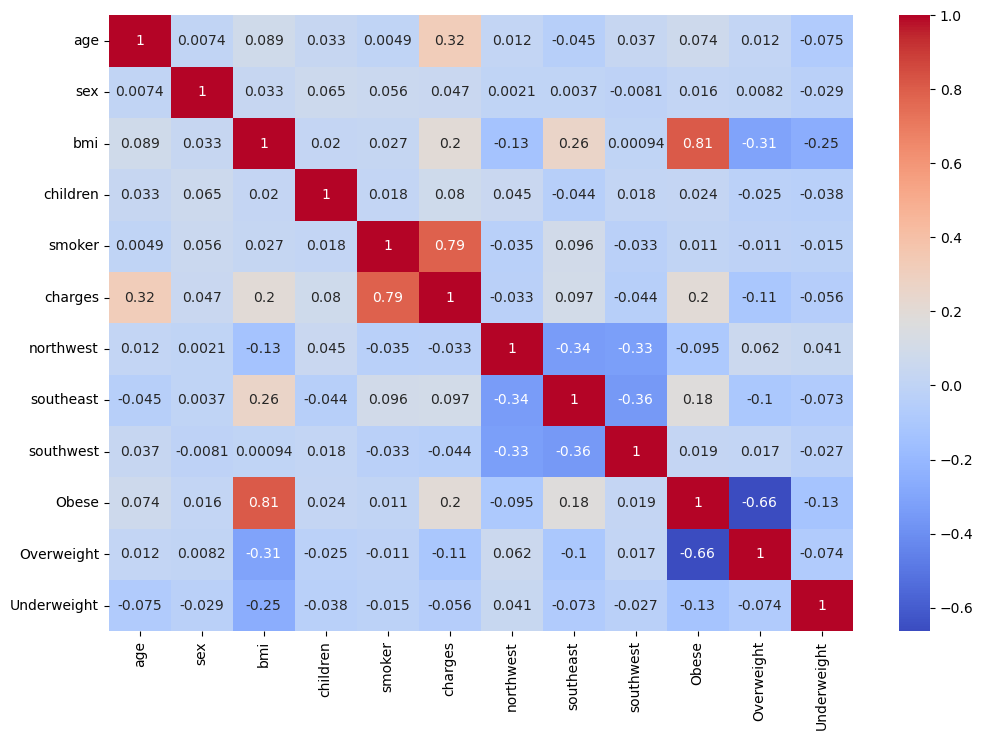

In [2218]:
plt.figure(figsize = (12, 8))
sns.heatmap(df_train.corr(), annot = True, cmap = "coolwarm")
plt.show()

# Dividing the train set into X, y

In [2220]:
X_train = df_train.drop('charges', axis = 1)
y_train = df_train.charges

# Feature Selection using RFE

In [2222]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2223]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select= 10)
rfe = rfe.fit(X_train, y_train)

In [2224]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('age', True, 1),
 ('sex', True, 1),
 ('bmi', True, 1),
 ('children', True, 1),
 ('smoker', True, 1),
 ('northwest', True, 1),
 ('southeast', True, 1),
 ('southwest', True, 1),
 ('Obese', True, 1),
 ('Overweight', False, 2),
 ('Underweight', True, 1)]

In [2225]:
col = X_train.columns[rfe.support_]
col

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'northwest', 'southeast',
       'southwest', 'Obese', 'Underweight'],
      dtype='object')

# Building model

In [2227]:
import statsmodels.api as sm

In [2228]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,age,sex,bmi,children,smoker,northwest,southeast,southwest,Obese,Underweight
967,0.565217,1,0.253027,0.2,0,1,0,0,0,0
522,0.717391,0,0.483051,0.0,0,0,0,0,1,0
155,0.565217,1,0.633844,0.0,0,1,0,0,1,0
672,0.391304,1,0.369653,0.0,0,0,1,0,0,0
1173,0.434783,1,0.357815,0.4,0,1,0,0,0,0


In [2229]:
X_train_sm = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     281.0
Date:                Sun, 13 Jul 2025   Prob (F-statistic):          4.01e-272
Time:                        19:25:19   Log-Likelihood:                 842.59
No. Observations:                 935   AIC:                            -1663.
Df Residuals:                     924   BIC:                            -1610.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0213      0.013     -1.664      

In [2230]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2231]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,bmi,12.18
8,Obese,5.15
0,age,2.91
6,southeast,2.19
1,sex,1.94
7,southwest,1.87
3,children,1.77
5,northwest,1.75
4,smoker,1.26
9,Underweight,1.02


In [2232]:
X_train_new = X_train_rfe.drop('sex', axis = 1)

X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     312.5
Date:                Sun, 13 Jul 2025   Prob (F-statistic):          2.37e-273
Time:                        19:25:20   Log-Likelihood:                 842.52
No. Observations:                 935   AIC:                            -1665.
Df Residuals:                     925   BIC:                            -1617.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0224      0.013     -1.789      

In [2233]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bmi,11.52
7,Obese,5.08
0,age,2.90
5,southeast,2.18
6,southwest,1.86
2,children,1.74
4,northwest,1.74
3,smoker,1.26
8,Underweight,1.02


In [2234]:
X_train_new = X_train_new.drop('Underweight', axis = 1)

X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     351.8
Date:                Sun, 13 Jul 2025   Prob (F-statistic):          1.32e-274
Time:                        19:25:20   Log-Likelihood:                 842.44
No. Observations:                 935   AIC:                            -1667.
Df Residuals:                     926   BIC:                            -1623.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0210      0.012     -1.749      0.0

In [2235]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bmi,11.44
7,Obese,5.08
0,age,2.89
5,southeast,2.18
6,southwest,1.85
2,children,1.74
4,northwest,1.72
3,smoker,1.25


In [2236]:
X_train_new = X_train_new.drop('northwest', axis = 1)

X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     402.3
Date:                Sun, 13 Jul 2025   Prob (F-statistic):          7.95e-276
Time:                        19:25:20   Log-Likelihood:                 842.21
No. Observations:                 935   AIC:                            -1668.
Df Residuals:                     927   BIC:                            -1630.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0240      0.011     -2.170      0.0

In [2237]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bmi,10.02
6,Obese,4.93
0,age,2.82
4,southeast,1.73
2,children,1.71
5,southwest,1.50
3,smoker,1.25


In [2238]:
X_train_new = X_train_new.drop('southeast', axis = 1)

X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     469.6
Date:                Sun, 13 Jul 2025   Prob (F-statistic):          4.05e-277
Time:                        19:25:20   Log-Likelihood:                 842.07
No. Observations:                 935   AIC:                            -1670.
Df Residuals:                     928   BIC:                            -1636.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0244      0.011     -2.208      0.0

In [2239]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,bmi,8.68
5,Obese,4.90
0,age,2.82
2,children,1.71
4,southwest,1.31
3,smoker,1.24


In [2240]:
X_train_new = X_train_new.drop('bmi', axis = 1)

X_train_sm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     562.1
Date:                Sun, 13 Jul 2025   Prob (F-statistic):          5.85e-278
Time:                        19:25:20   Log-Likelihood:                 840.78
No. Observations:                 935   AIC:                            -1670.
Df Residuals:                     929   BIC:                            -1641.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0113      0.007     -1.517      0.1

In [2241]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,age,2.10
4,Obese,1.79
1,children,1.59
3,southwest,1.28
2,smoker,1.20


# Residual Analysis

In [2243]:
y_train_pred = lm.predict(X_train_sm)

<Axes: ylabel='Density'>

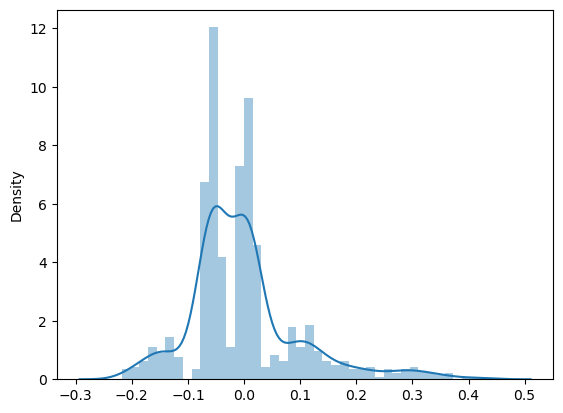

In [2244]:
sns.distplot(res)

# Predictions and Evaluations on Test Set

In [2246]:
num_vars

['age', 'bmi', 'children', 'charges']

In [2247]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest,Obese,Overweight,Underweight
12,0.108696,1,0.496099,0.0,0,0.011253,0,0,1,1,0,0
306,0.217391,0,0.310465,0.4,0,0.304170,0,0,1,0,1,0
318,0.565217,0,0.314366,0.0,0,0.100550,1,0,0,0,1,0
816,0.130435,0,0.222357,0.0,0,0.027469,1,0,0,0,0,0
157,0.000000,1,0.247915,0.0,1,0.229795,0,0,0,0,1,0


In [2248]:
df_test.describe()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest,Obese,Overweight,Underweight
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,0.473989,0.504975,0.395676,0.229353,0.206468,0.189466,0.251244,0.273632,0.218905,0.527363,0.303483,0.017413
std,0.300689,0.500598,0.161244,0.247146,0.405274,0.183002,0.434269,0.446378,0.414020,0.499873,0.460335,0.130967
min,0.000000,0.000000,0.023002,0.000000,0.000000,0.000154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.217391,0.000000,0.281141,0.000000,0.000000,0.066072,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.478261,1.000000,0.383239,0.200000,0.000000,0.136517,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.739130,1.000000,0.488162,0.400000,0.000000,0.220376,0.750000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,0.890503,1.000000,1.000000,0.940158,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2249]:
X_test = df_test.drop('charges', axis = 1)
y_test = df_test.charges

In [2250]:
X_test_new = X_test_sm[X_train_new.columns]

X_test_sm = sm.add_constant(X_test_new)
X_test_sm.head()

,const,age,children,smoker,southwest,Obese
12,1.0,0.108696,0.0,0,1,1
306,1.0,0.217391,0.4,0,1,0
318,1.0,0.565217,0.0,0,0,0
816,1.0,0.130435,0.0,0,0,0
157,1.0,0.000000,0.0,1,0,0


In [2314]:
y_test_pred = lm.predict(X_test_sm)
y_test_pred

12      0.060006
306     0.033687
318     0.099106
816     0.014197
157     0.372069
          ...   
711     0.142074
1006    0.048674
389     0.105481
924     0.079873
1164    0.095117
Length: 402, dtype: float64

In [2318]:
from sklearn.metrics import r2_score

r2_score(y_test, y_test_pred)

0.755931491891944